In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [29]:
data=pd.read_csv("C:\suicide_rate_dataset.csv")
data
data = data[data['country'] == 'Sweden']

In [31]:
data.info()
# which fields have null values
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
data = data.dropna(axis = 0)  # the lines has null values are deleted
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 24404 to 24703
Data columns (total 12 columns):
country               108 non-null object
year                  108 non-null int64
sex                   108 non-null object
age                   108 non-null object
suicides_no           108 non-null int64
population            108 non-null int64
suicides/100k pop     108 non-null float64
country-year          108 non-null object
HDI for year          108 non-null float64
 gdp_for_year ($)     108 non-null object
gdp_per_capita ($)    108 non-null int64
generation            108 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 11.0+ KB
Series([], dtype: int64)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
24404,Sweden,1990,male,75+ years,144,261500,55.07,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
24405,Sweden,1990,male,55-74 years,287,798100,35.96,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
24406,Sweden,1990,male,35-54 years,340,1174000,28.96,Sweden1990,0.815,"258,154,283,909",32246,Silent
24407,Sweden,1990,male,25-34 years,157,606600,25.88,Sweden1990,0.815,"258,154,283,909",32246,Boomers
24408,Sweden,1990,female,55-74 years,138,883800,15.61,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation


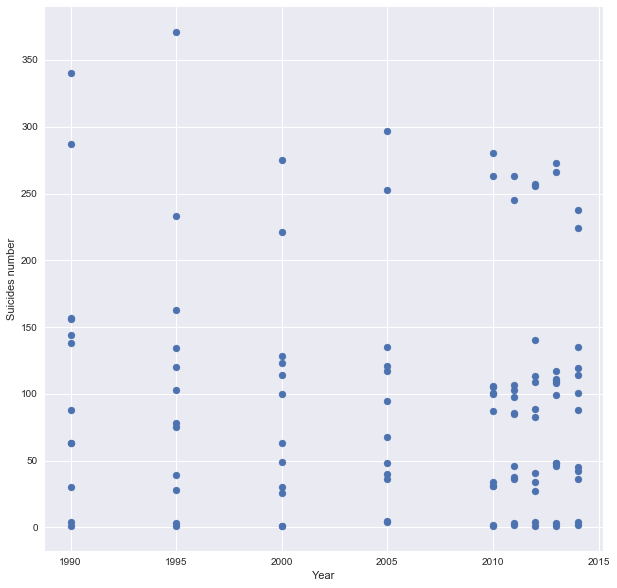

In [32]:
x = np.array(data.loc[:,'year']).reshape(-1,1)
y = np.array(data.loc[:,'suicides_no']).reshape(-1,1)
#Scatter Plot
plt.figure(figsize = [10,10])
plt.scatter(x=x,y=y,)
plt.xlabel('Year')
plt.ylabel('Suicides number')
plt.show()

female 5-14 years R^2 Score:  0.298597785978


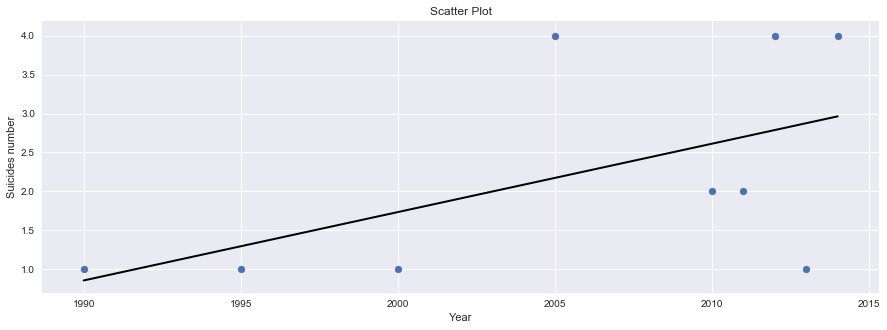

female 15-24 years R^2 Score:  0.412465328926


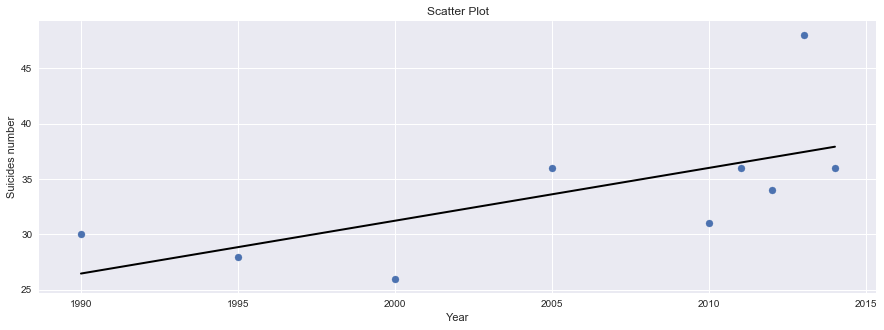

female 25-34 years R^2 Score:  0.179558042029


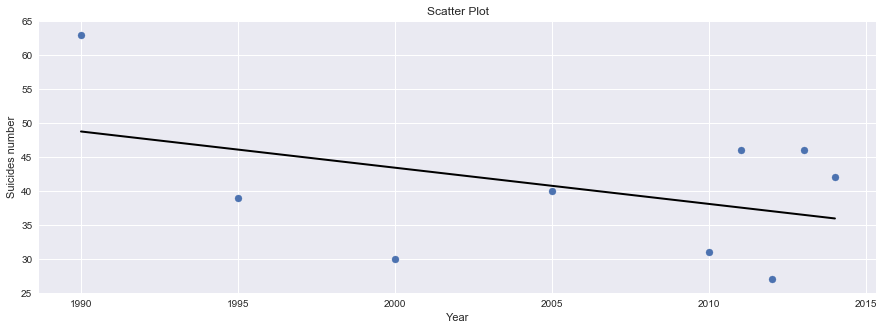

female 35-54 years R^2 Score:  0.430138011784


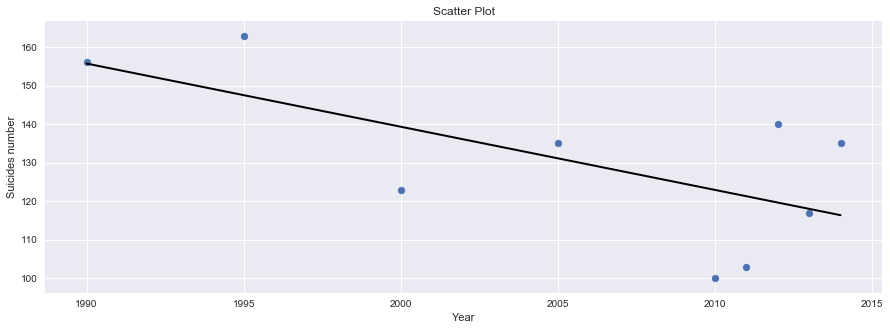

female 55-74 years R^2 Score:  0.390117868805


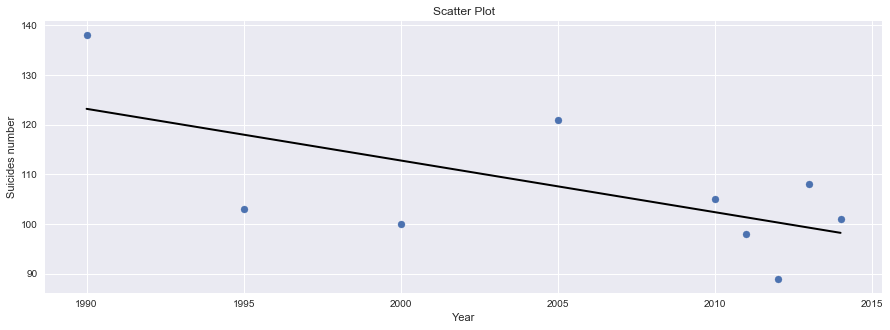

female 75+ years R^2 Score:  0.625590305083


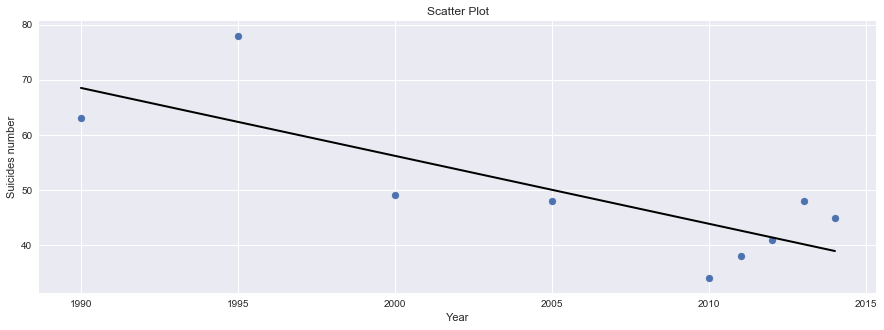

male 5-14 years R^2 Score:  0.131026639034


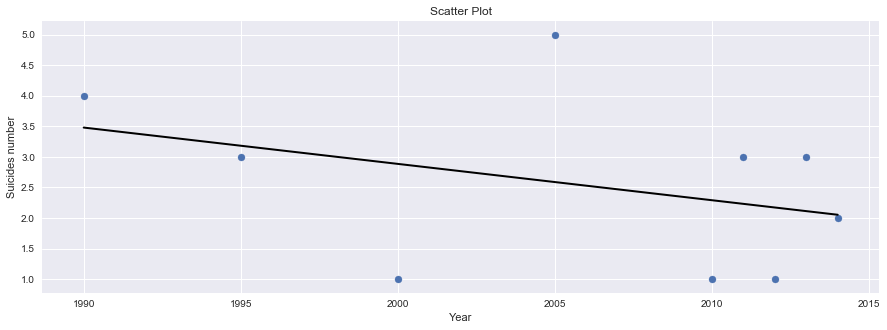

male 15-24 years R^2 Score:  0.165671460631


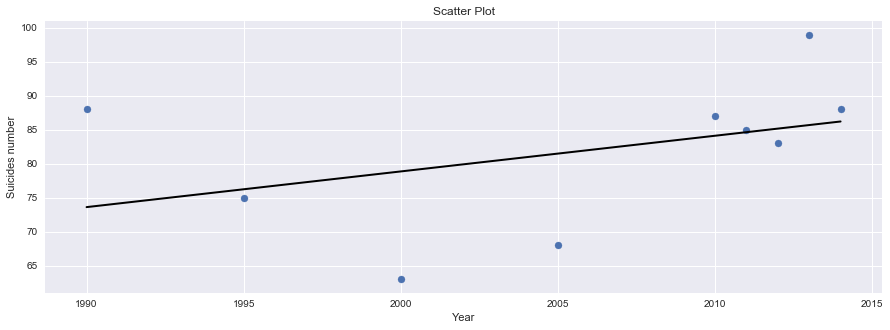

male 25-34 years R^2 Score:  0.588863583467


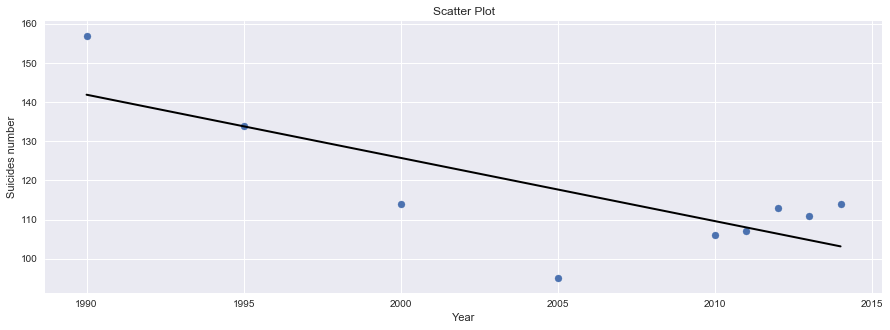

male 35-54 years R^2 Score:  0.760812097332


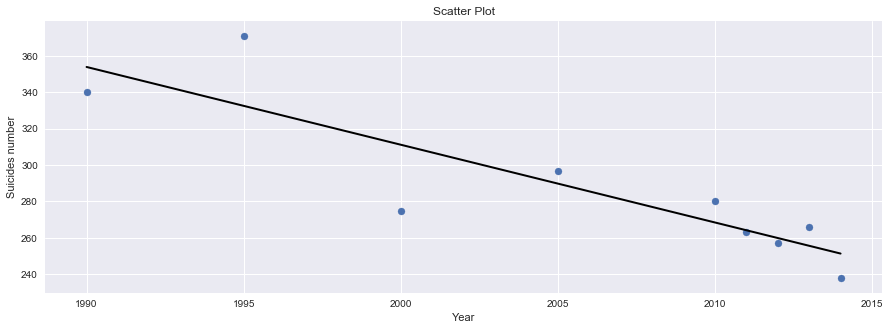

male 55-74 years R^2 Score:  0.0196216687225


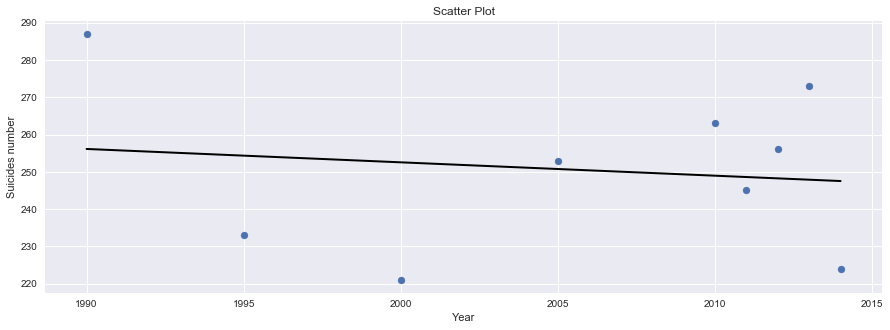

male 75+ years R^2 Score:  0.543507479485


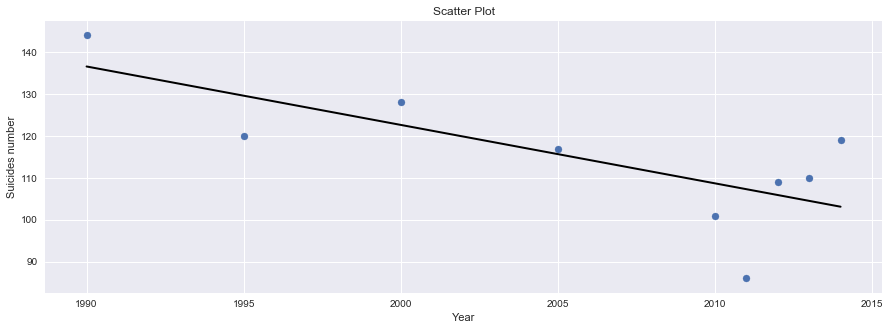

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)  # Prediction Space
#print(predict_space)
lis = ['female', 'male']
lis2 = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in lis:
    for k in lis2:
        data_1 = data[data['sex'] == i]
        data_sex = data_1[data_1['age'] == k ]
        x_sex = np.array(data_sex.loc[:,'year']).reshape(-1,1)
        y_sex = np.array(data_sex.loc[:,'suicides_no']).reshape(-1,1)
        reg.fit(x_sex,y_sex)                                               # Fit
        predicted = reg.predict(predict_space)                     # Prediction
        print( i, k, 'R^2 Score: ', reg.score(x_sex,y_sex))                       # R^2 calculation
        # print(i)
        #plt.figure(figsize = [9,6])
        #print(i,k)
        plt.plot(predict_space, predicted, color = 'black', linewidth = 2)
        plt.scatter(x_sex,y_sex)
        plt.title('Scatter Plot')
        plt.xlabel('Year')
        plt.ylabel('Suicides number')
        plt.show()